In [1]:
# Latihan 1
# import library pandas
import pandas as pd

# import library numpy
import numpy as np

# import library matplotlib
import matplotlib.pyplot as plt

# import library seaborn
import seaborn as sns

# me non aktifkan peringatan pada python dengan import warning -> 'ignore'
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Panggil file (load file bernama Iris_unclean.csv) dan simpan dalam dataframe Lalu tampilkan 10 baris awal dataset dengan function head()
df = pd.read_csv("Iris_unclean.csv")
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,NaN,3.5,1.4,0.2,Iris-setosa
1,4.9,2000.0,1.4,0.2,Iris-setosa
2,4.7,3.2,-1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,NaN,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,-1.5,0.2,Iris-setosa
8,4.4,1500.0,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# Latihan 2
# menghasilkan jumlah baris dan jumlah kolom (bentuk data) pada data df dengan fungsi .shape
df.shape

(150, 5)

In [4]:
# fungsi describe() untuk mengetahui statistika data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,148.000000,150.000000,150.000000,150.000000
mean,5.856757,26.348000,3.721333,1.198667
std,0.824964,203.117929,1.842364,0.763161
min,4.300000,2.000000,-1.500000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,2000.000000,6.900000,2.500000


In [5]:
# Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  148 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#cek nilai yang hilang / missing values di dalam data
df.isna().sum()

SepalLengthCm    2
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Latihan 3
df['SepalLengthCm'].describe()

count    148.000000
mean       5.856757
std        0.824964
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [8]:
# Latihan 4
print('Nilai NaN pada kolom SepalLengthCm berjumlah :', df['SepalLengthCm'].isna().sum())

Nilai NaN pada kolom SepalLengthCm berjumlah : 2


In [9]:
# Latihan 5
index_nan = np.where(df['SepalLengthCm'].isna())
index_nan


(array([0, 6]),)

In [27]:
index_nan = np.where(df['SepalLengthCm'].isna())
index_nan

(array([], dtype=int64),)

In [10]:
# Latihan 6
# Cetak ukuran awal dataframe
print("Ukuran awal df: %d baris, %d kolom." % df.shape)

# Drop baris jika ada satu saja data yang missing dengan function dropna() dan cetak ukurannya 
df = df.dropna(axis=0, how="any")
print("Ukuran df setelah dibuang baris yang memiliki missing value: %d baris, %d kolom." % df.shape)

Ukuran awal df: 150 baris, 5 kolom.
Ukuran df setelah dibuang baris yang memiliki missing value: 148 baris, 5 kolom.


In [11]:
# Latihan 7
df['SepalWidthCm'].describe()

count     148.000000
mean       26.657432
std       204.477337
min         2.000000
25%         2.800000
50%         3.000000
75%         3.300000
max      2000.000000
Name: SepalWidthCm, dtype: float64

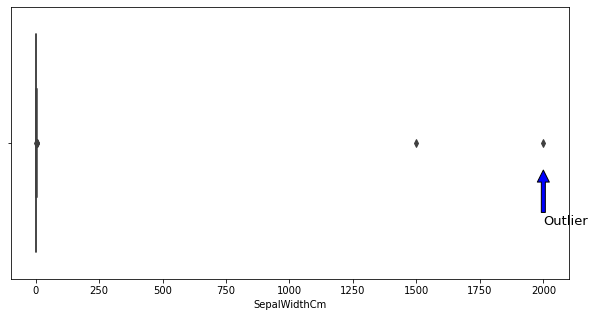

In [12]:
# Latihan 8
plt.figure(figsize = (10, 5))
sns.boxplot(df['SepalWidthCm'])
plt.annotate('Outlier', (df['SepalWidthCm'].describe()['max'],0.1), xytext = (df['SepalWidthCm'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['SepalWidthCm'].describe()['75%'] - df['SepalWidthCm'].describe()['25%']

In [13]:
# Latihan 9
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [14]:
# Latihan 10
detect_outliers(df,'SepalWidthCm')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,2000.0,1.4,0.2,Iris-setosa
8,4.4,1500.0,1.4,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [15]:
# Latihan 11
df = df.drop((df[df['SepalWidthCm']>4]).index, axis=0)

In [16]:
df = df.drop((df[df['SepalWidthCm']<2.1]).index, axis=0)

In [17]:
# Latihan 12
detect_outliers(df,'SepalWidthCm')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


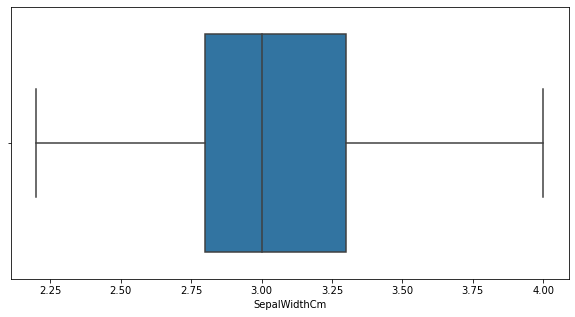

In [18]:
# Latihan 13
plt.figure(figsize = (10, 5))
sns.boxplot(df['SepalWidthCm'])

In [19]:
# Latihan 14
df['SepalWidthCm'].describe()

count    142.000000
mean       3.032394
std        0.397430
min        2.200000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.000000
Name: SepalWidthCm, dtype: float64

In [20]:
# Latihan 15
df[df['PetalLengthCm']<1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,4.7,3.2,-1.3,0.2,Iris-setosa
7,5.0,3.4,-1.5,0.2,Iris-setosa


In [21]:
# latihan 16
df = df.drop((df[df['PetalLengthCm']<1]).index, axis=0)

In [22]:
# latihan 17
df[df['PetalLengthCm']<1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [23]:
# latihan 18
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 3 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  140 non-null    float64
 1   SepalWidthCm   140 non-null    float64
 2   PetalLengthCm  140 non-null    float64
 3   PetalWidthCm   140 non-null    float64
 4   Species        140 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


In [24]:
# latihan 19
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [25]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
